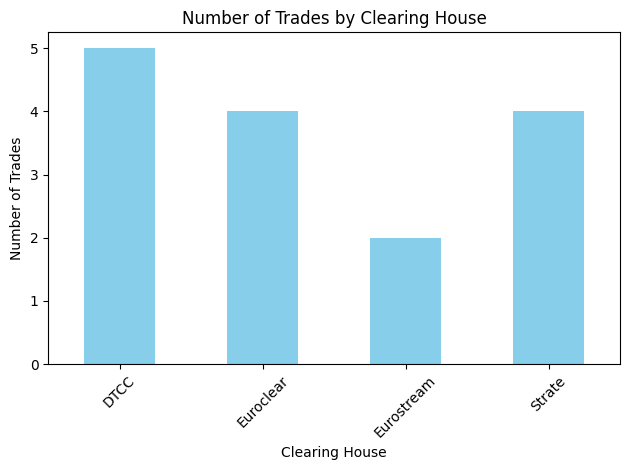

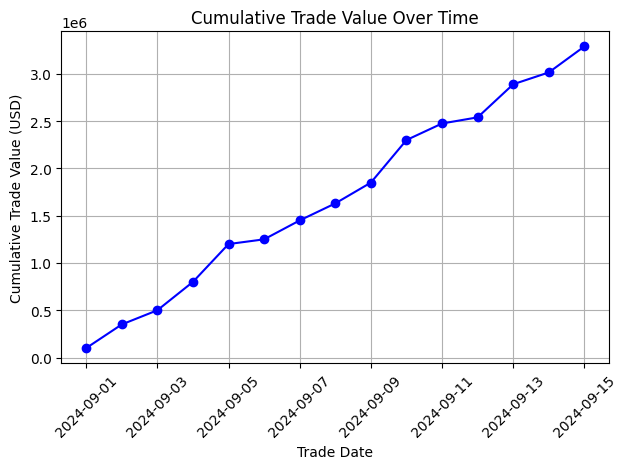

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Expanded dataset including additional trades and cancelled trades
data = {
    'Transaction ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115],
    'Clearing House': ['Strate', 'Euroclear', 'DTCC', 'Eurostream', 'Strate', 'DTCC', 'Euroclear',
                       'Strate', 'DTCC', 'Euroclear', 'Eurostream', 'DTCC', 'Strate', 'Euroclear', 'DTCC'],
    'Trade Value (USD)': [100000, 250000, 150000, 300000, 400000, 50000, 200000, 180000, 220000,
                          450000, 175000, 65000, 350000, 125000, 275000],
    'Settlement Status': ['Settled', 'Pending', 'Settled', 'Settled', 'Pending', 'Settled', 'Pending',
                          'Canceled', 'Canceled', 'Settled', 'Pending', 'Settled', 'Settled', 'Canceled', 'Settled'],
    'Trade Date': pd.date_range(start='2024-09-01', periods=15, freq='D')  # Dates for line graph
}

# Create a DataFrame
df = pd.DataFrame(data)

# Visualization 1: Bar chart of trades by Clearing House
def visualize_trade_settlement(df):
    house_summary = df.groupby('Clearing House').size()

    # Bar chart using matplotlib
    house_summary.plot(kind='bar', color='skyblue')
    plt.title('Number of Trades by Clearing House')
    plt.xlabel('Clearing House')
    plt.ylabel('Number of Trades')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualization 2: Trade Value by Clearing House using Plotly
def visualize_trade_value(df):
    fig = px.bar(df, x='Clearing House', y='Trade Value (USD)', color='Settlement Status',
                 title="Trade Value by Clearing House", barmode='group')
    fig.show()

# Visualization 3: Line Graph of Cumulative Trade Value Over Time
def visualize_cumulative_trade_value(df):
    df_sorted = df.sort_values('Trade Date')
    df_sorted['Cumulative Value'] = df_sorted['Trade Value (USD)'].cumsum()  # Calculate cumulative trade value

    # Line graph using matplotlib
    plt.plot(df_sorted['Trade Date'], df_sorted['Cumulative Value'], marker='o', linestyle='-', color='blue')
    plt.title('Cumulative Trade Value Over Time')
    plt.xlabel('Trade Date')
    plt.ylabel('Cumulative Trade Value (USD)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualization 4: Interactive Pie Chart for Settlement Status Breakdown
def visualize_settlement_pie_chart(df):
    # Pie chart using Plotly
    fig = px.pie(df, names='Settlement Status', title="Settlement Status Breakdown", hole=0.4)
    fig.show()

# Call the functions to visualize the data
visualize_trade_settlement(df)
visualize_trade_value(df)
visualize_cumulative_trade_value(df)
visualize_settlement_pie_chart(df)
